We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [2]:
# Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np

# Setup
warnings.filterwarnings("ignore")

data=pd.read_csv('/Users/dehilinesma/Downloads/Lab_21_Time_Series_Models/airlines_passengers.csv')

Let’s display the first five rows of data

In [2]:
data.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [3]:
data.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [4]:
data['Month'] = pd.to_datetime(data['Month'])
print(data.head())

       Month  Passengers
0 1949-01-01         112
1 1949-02-01         118
2 1949-03-01         132
3 1949-04-01         129
4 1949-05-01         121


The next thing we can do is convert the month column to an index. 


In [5]:
data.index = data['Month']
del data['Month']
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

Text(0, 0.5, 'Number of Passengers')

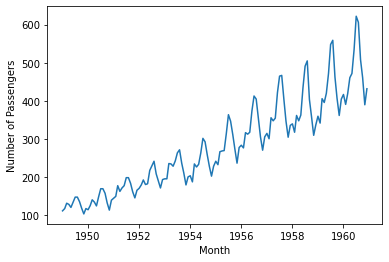

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=data, x= 'Month', y= 'Passengers')
plt.ylabel('Number of Passengers')

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [37]:
result = adfuller(data["Passengers"])
print(result)
print(': %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])
"""
Data is non stationary since we accepted H0 hypothesis"""

(0.8153688792060502, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
: 0.82
5% Critical Value: -2.88
p-value: 0.99


'\nData is non stationary since we accepted H0 hypothesis'

In [8]:
#The p-value is greater than 0.05. 
#You fail to reject the null hypothesis and conclude that the time series is not stationary.

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [40]:
result2 = adfuller(data["Passengers"], autolag='AIC')
print(result2)
print(': %.2f' % result2[0])
print('5%% Critical Value: %.2f' % result2[4]['5%'])
print('p-value: %.2f' % result2[1])
"""
Data is non stationary since we accepted H0 hypothesis"""

(0.8153688792060502, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
: 0.82
5% Critical Value: -2.88
p-value: 0.99


'\nData is non stationary since we accepted H0 hypothesis'

Store our results in a dataframe display it

In [41]:
resl=pd.DataFrame(result)
resl

,0
0,0.815369
1,0.99188
2,13
3,130
4,"{'1%': -3.4816817173418295, '5%': -2.884041834..."
5,996.692931


Explain the results

In [11]:
#The p-value is greater than 0.05. 
#You fail to reject the null hypothesis and conclude that the time series is not stationary.

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

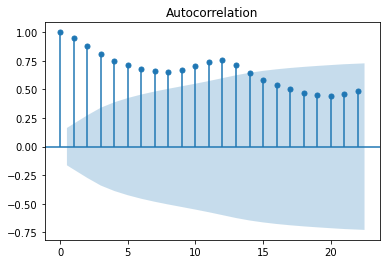

In [42]:
plot_acf(data['Passengers'])
plt.show()

Calculate partial autocorrelation

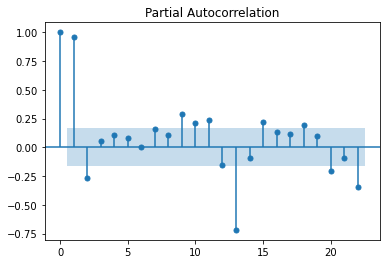

In [43]:
plot_pacf(data['Passengers'])
plt.show()


Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


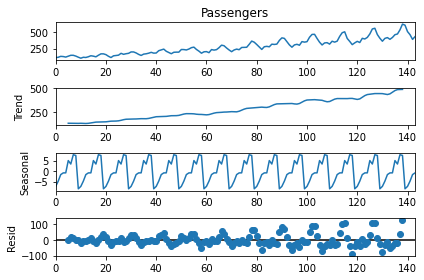

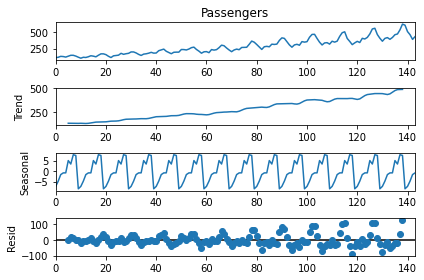

In [47]:
seasonal_decompose(data['Passengers'], freq=10).plot()


Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

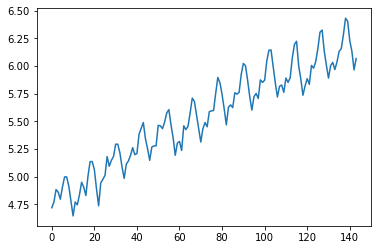

In [49]:
data_log = np.log(data.Passengers)
plt.plot(data_log)

MA(1)

In [50]:
from statsmodels.tsa.arima_model import ARMA
model_MA1 = ARMA(data_log, order=(1,0))
result_MA1 = model_MA1.fit()
print(result_MA1.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.03749D-01    |proj g|=  4.66436D-02

At iterate    5    f= -8.12950D-01    |proj g|=  7.85150D-04

At iterate   10    f= -8.12955D-01    |proj g|=  2.44249D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     15      1     0     0   4.441D-08  -8.130D-01
  F = -0.81295459228199307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                      

 This problem is unconstrained.


Display the output

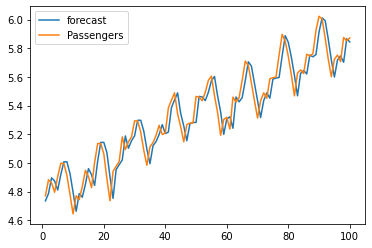

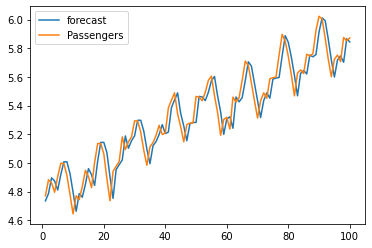

In [51]:
result_MA1.plot_predict(start=1,end=100)

MA(2)

In [52]:
from statsmodels.tsa.arima_model import ARMA
model_MA2 = ARMA(df_log, order=(1,2))
result_MA2 = model_MA2.fit()
result_MA2

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.44173D-01    |proj g|=  4.83719D-02

At iterate    5    f= -8.55141D-01    |proj g|=  1.72761D-03

At iterate   10    f= -8.55193D-01    |proj g|=  4.42979D-06

At iterate   15    f= -8.55193D-01    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   4.441D-08  -8.552D-01
  F = -0.85519253645388715     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


Display the output

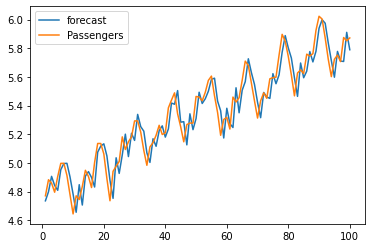

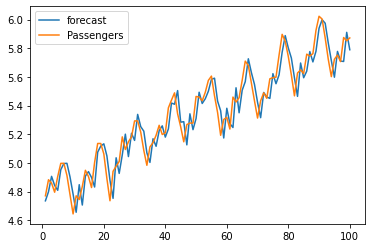

In [53]:
result_MA2.plot_predict(start=1,end=100)

AR(2)

In [54]:
from statsmodels.tsa.arima_model import ARMA
model3 = ARMA(data_log, order=(2,0))
result_AR2 = model3.fit()
print(result_AR2.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.32139D-01    |proj g|=  3.98339D-02

At iterate    5    f= -8.37778D-01    |proj g|=  1.05868D-03

At iterate   10    f= -8.37787D-01    |proj g|=  7.77156D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   7.772D-08  -8.378D-01
  F = -0.83778731491482894     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                      

 This problem is unconstrained.


ARMA (?,?)

In [55]:
model4 = ARMA(df_log, order=(2,1))
result_ARMA = model4.fit()
print(result_ARMA.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.56557D-01    |proj g|=  4.05455D-02

At iterate    5    f= -8.63406D-01    |proj g|=  1.56976D-03

At iterate   10    f= -8.63448D-01    |proj g|=  5.10703D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   0.000D+00  -8.634D-01
  F = -0.86344831608659744     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                      

 This problem is unconstrained.


Display the output

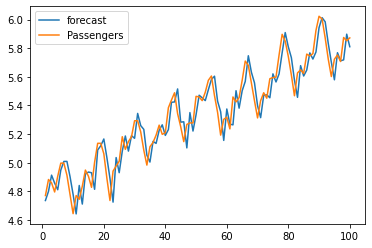

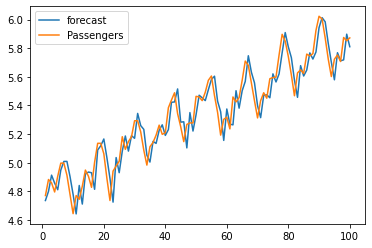

In [56]:
result_ARMA.plot_predict(start=1,end=100)

ARIMA(?,?)

In [57]:
from statsmodels.tsa.arima_model import ARIMA
X = data_log
index = round(len(X)*0.8)
train, test = X[0:index], X[index:]
model = ARIMA(train, order=(1,1,1))
result_ARIMA = model.fit()

result_ARIMA.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.96439D-01    |proj g|=  1.96152D-02

At iterate    5    f= -8.97635D-01    |proj g|=  6.40810D-03

At iterate   10    f= -8.97814D-01    |proj g|=  9.99201D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     19      1     0     0   9.992D-08  -8.978D-01
  F = -0.89781385932326085     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  114
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 102.351
Method:                       css-mle   S.D. of innovations              0.098
Date:                Wed, 19 Jan 2022   AIC                           -196.702
Time:                        17:51:19   BIC                           -185.757
Sample:                             1   HQIC                          -192.260
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0131      0.011      1.223      0.221      -0.008       0.034
ar.L1.D.Passengers    -0.5836      0.151     -3.857      0.000      -0.880      -0.287
ma.L1.D.Passengers     0.8426      0.103      8.220      0.000       0.642       1.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7134           +0.0000j            1.7134            0.5000
MA.1           -1.1868           +0.0000j            1.1868            0.5000
-----------------------------------------------------------------------------
"""

Display the output

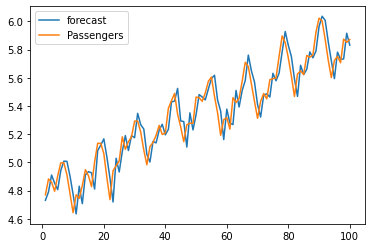

In [58]:
y=result_ARIMA.plot_predict(start=1,end=100)

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [63]:
from statsmodels.tools.eval_measures import rmse
# prediction:
pred=result_MA1.predict(test.index[0], test.index[-1])
pred1=result_MA2.predict(test.index[0], test.index[-1])
pred2=result_ARMA.predict(test.index[0], test.index[-1])
pred3=result_ARIMA.predict(test.index[0], test.index[-1])

from statsmodels.tools.eval_measures import rmse
rmse_MA1 = rmse(test,pred)
rmse_AR2 = rmse(test,pred1)
rmse_ARMA = rmse(test,pred2)
rmse_ARIMA = rmse(test,pred3)
# calc rmse
print(rmse_MA1)
print(rmse_AR2)
print(rmse_ARMA)
print(rmse_ARIMA)

0.11432237345416807
0.11064472890392682
0.10863207879133358
6.061298020784118


Calculate AIC

In [66]:
print(result_MA1.aic)
print(result_AR2.aic)
print(result_ARMA.aic)
print(result_ARIMA.aic)


-228.130922577214
-233.28274669547073
-238.67311503294007
-196.70155992570346
